In [1]:
getwd()

[1] "/home/m/repo/ml-recipes/jupyter"

In [2]:
library(renv)
renv::activate()


Attaching package: ‘renv’


The following objects are masked from ‘package:stats’:

    embed, update


The following objects are masked from ‘package:utils’:

    history, upgrade


The following objects are masked from ‘package:base’:

    autoload, load, remove




In [3]:
getwd()
source("features.R")


[1] "/home/m/repo/ml-recipes/jupyter"

In [4]:
library(FFTrees)
library(data.table)
source("features.R")

feature_col = c(red, blue)
target = c("WINNER")

all <- fread(file = "data/mma.csv")

             

   O         

  / \       

 F   O       

    / \     

   F   Trees 

             

Welcome to FFTrees 1.9.0!

FFTrees.guide() opens the main guide.



In [5]:
all[,(target) := lapply(.SD, as.logical), .SDcols=target]

In [6]:

selected <- subset(all, select = c(feature_col, target))
# selected <- all[, ..(feature_col, target)]

# colnames(selected)
# lapply(selected, class)
head(selected, 5)

R_AGE,R_HEIGHT,R_WEIGHT,R_REACH,R_WIN_PCT,R_WIN_STREAK,R_LOSS_STREAK,R_KD,R_SIG_STR,R_SIG_STR_ATT,⋯,B_BODY_ATT,B_LEG,B_LEG_ATT,B_DISTANCE,B_DISTANCE_ATT,B_CLINCH,B_CLINCH_ATT,B_GROUND,B_GROUND_ATT,WINNER
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
33,180.3,65.8,182.9,0.6666667,0,1,0.032885722,5.072623,11.937517,⋯,1.4277988,0.7301244,0.9572742,3.553272,7.934018,0.03244997,0.09734992,0.71389941,1.08707409,TRUE
33,190.5,104.3,198.1,0.2857143,0,1,0.013780432,5.829123,13.187873,⋯,1.6703687,1.5637494,1.8302976,5.561972,12.794314,0.49755664,0.67525544,0.17769880,0.24877832,TRUE
29,175.3,56.7,172.7,0.5000000,0,2,0.077369439,3.442940,8.394584,⋯,0.4755614,0.1321004,0.1585205,1.268164,2.985469,0.31704095,0.34346103,0.07926024,0.07926024,TRUE
33,175.3,56.7,172.7,0.6666667,2,0,0.006025306,4.488853,12.659169,⋯,0.9400000,0.5200000,0.5700000,3.120000,9.000000,0.60000000,0.80000000,0.05000000,0.10000000,TRUE
37,180.3,77.1,190.5,0.5000000,1,0,0.008022999,4.757639,13.001270,⋯,0.6164384,0.1369863,0.1369863,3.150685,8.561644,0.00000000,0.00000000,0.00000000,0.00000000,TRUE


In [7]:
selected[,R_TD_ACC:=R_TD/R_TD_ATT]
selected[,B_TD_ACC:=B_TD/B_TD_ATT]

selected[is.na(selected)] <- 0


In [8]:
library(vctrs)
library(rsample)
#Code
set.seed(1)
split_strat <- initial_split(selected, prop = 0.8,
                             strata = 'WINNER')
train <- training(split_strat)
test <- testing(split_strat)

In [9]:
head(train)

R_AGE,R_HEIGHT,R_WEIGHT,R_REACH,R_WIN_PCT,R_WIN_STREAK,R_LOSS_STREAK,R_KD,R_SIG_STR,R_SIG_STR_ATT,⋯,B_LEG_ATT,B_DISTANCE,B_DISTANCE_ATT,B_CLINCH,B_CLINCH_ATT,B_GROUND,B_GROUND_ATT,WINNER,R_TD_ACC,B_TD_ACC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>
38,182.9,77.1,190.5,0.6428571,0,1,0.044316783,4.303652,9.661059,⋯,0.6814982,4.1284145,10.076035,0.2647142,0.4336807,0.3097719,0.4787384,FALSE,0.5000000,0.2820513
36,175.3,70.3,188.0,0.6666667,0,2,0.017980222,4.701828,12.397363,⋯,0.8463252,3.0289532,6.948775,0.4454343,0.4454343,0.6236080,1.0690423,FALSE,0.2400000,0.3478261
36,162.6,56.7,170.2,0.5555556,1,0,0.008076457,4.555122,10.434783,⋯,1.9000000,6.3000000,11.000000,0.6000000,1.0000000,0.1000000,0.1000000,FALSE,0.4705882,0.2000000
33,172.7,61.2,175.3,0.9230769,11,0,0.028188865,4.439746,8.689218,⋯,0.1471490,0.8951563,3.016554,0.6744329,0.8093194,0.6744329,0.8461067,FALSE,0.5476190,0.4800000
26,172.7,61.2,175.3,0.6000000,3,0,0.017351070,3.938693,9.768652,⋯,0.7162397,7.9234021,12.817707,0.1641383,0.2089033,0.2835116,0.2984332,FALSE,0.2000000,0.5000000
35,167.6,61.2,165.1,0.6000000,0,1,0.029691211,5.558195,12.701900,⋯,0.7020642,3.3381168,9.438128,0.3311624,0.4040181,0.2053207,0.2914229,FALSE,0.2121212,0.3472222


In [10]:
mma.fft <- FFTrees(formula = WINNER ~ .,
                   data = train,
                   data.test = test,
                   main = "MMA",
                   max.levels = 6,
                   decision.labels = c("BLUE", "RED"),
                   do.comp = T
                   )

Aiming to create a new FFTrees object:
— Setting 'goal = bacc'
— Setting 'goal.chase = bacc'
— Setting 'goal.threshold = bacc'
— User set 'max.levels = 6'
— Using default 'cost.outcomes' = (0 1 1 0)
— Using default 'cost.cues' = (0 per cue)
Successfully created a new FFTrees object.
Aiming to define FFTs:
Aiming to create FFTs with 'ifan' algorithm (chasing 'bacc'):
Aiming to rank 60 cues (optimizing 'bacc'):



[=======>-------------------------------------------------------]  13%

[========>------------------------------------------------------]  15%

[=========>-----------------------------------------------------]  17%

[===========>---------------------------------------------------]  18%

[============>--------------------------------------------------]  20%

[=============>-------------------------------------------------]  22%

[==============>------------------------------------------------]  23%

[===============>-----------------------------------------------]  25%

[================>----------------------------------------------]  27%

[=================>---------------------------------------------]  28%

[==================>--------------------------------------------]  30%

[===================>-------------------------------------------]  32%

[====================>------------------------------------------]  33%

[=====================>----------------------------------------

Successfully ranked 60 cues.
Successfully created 12 FFTs with 'ifan' algorithm.
Successfully defined 12 FFTs.
Aiming to apply FFTs to 'train' data:
Successfully applied FFTs to 'train' data.
Aiming to rank FFTs by 'train' data:
Successfully ranked FFTs by 'train' data.
Aiming to apply FFTs to 'test' data:
Successfully applied FFTs to 'test' data.
Aiming to express FFTs in words:
Successfully expressed FFTs in words.
Aiming to fit comparative algorithms (disable by do.comp = FALSE):


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


Successfully fitted comparative algorithms.


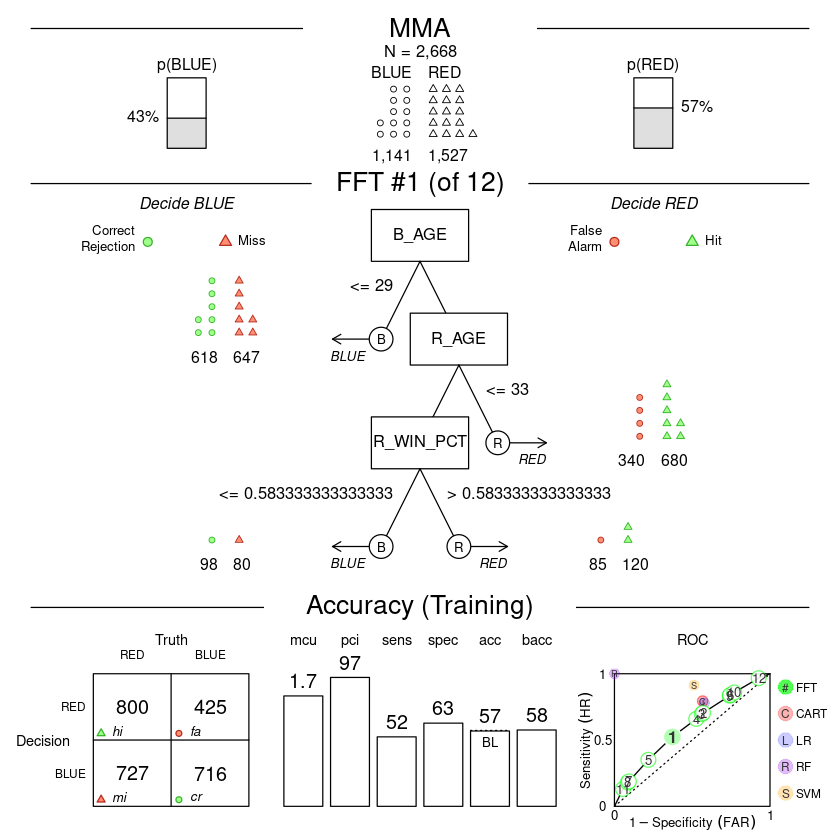

In [11]:
plot(mma.fft)

In [12]:
fftrees_ffttowords(mma.fft, digits = 1)

Aiming to express FFTs in words:
Successfully expressed FFTs in words.


MMA
FFTrees 
- Trees: 12 fast-and-frugal trees predicting WINNER
- Outcome costs: [hi = 0, fa = 1, mi = 1, cr = 0]

FFT #1: Definition
[1] If B_AGE <= 29, decide BLUE.
[2] If R_AGE <= 33, decide RED.
[3] If R_WIN_PCT > 0.583333333333333, decide RED, otherwise, decide BLUE.

FFT #1: Training Accuracy
Training data: N = 2,668, Pos (+) = 1,527 (57%) 

|          | True +   | True -   |   Totals:
|----------|----------|----------|
| Decide + | hi   800 | fa   425 |     1,225
| Decide - | mi   727 | cr   716 |     1,443
|----------|----------|----------|
  Totals:       1,527      1,141   N = 2,668

acc  = 56.8%   ppv  = 65.3%   npv  = 49.6%
bacc = 57.6%   sens = 52.4%   spec = 62.8%

FFT #1: Training Speed, Frugality, and Cost
mcu = 1.67,  pci = 0.97,  E(cost) = 0.432


In [13]:
mma.fft$competition$test

algorithm,n,hi,fa,mi,cr,sens,spec,far,ppv,npv,acc,bacc,wacc,dprime,cost_dec,cost_cue,cost
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fftrees,668,207,118,175,168,0.5418848,0.5874126,0.4125874,0.6369231,0.4897959,0.5613772,0.5646487,0.5646487,0.3255477,0.4386228,0,0.4386228
lr,668,290,177,92,109,0.7591623,0.3811189,0.6188811,0.6209850,0.5422886,0.5973054,0.5701406,0.5701406,0.4005240,NA,NA,NA
cart,668,272,178,110,108,0.7120419,0.3776224,0.6223776,0.6044444,0.4954128,0.5688623,0.5448321,0.5448321,0.2473782,NA,NA,NA
rf,668,312,197,70,89,0.8167539,0.3111888,0.6888112,0.6129666,0.5597484,0.6002994,0.5639714,0.5639714,0.4099531,NA,NA,NA
svm,668,313,181,69,105,0.8193717,0.3671329,0.6328671,0.6336032,0.6034483,0.6257485,0.5932523,0.5932523,0.5725460,NA,NA,NA
